In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

In [2]:
df_main = pd.read_csv("./Master-Data.csv")

In [4]:
df_main_sub = df_main[["order_id","order_status","order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date","payment_sequential","payment_type","payment_installments","payment_value","order_item_id","shipping_limit_date","price","freight_value"]]

In [45]:
df_main_sub[df_main_sub["order_estimated_delivery_date"] < df_main_sub["order_delivered_customer_date"]]

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,shipping_limit_date,price,freight_value
68,f7f0b79050e7ef0b1cf7ffceb0aa114a,delivered,2018-08-04 14:40:31,2018-08-07 04:44:36,2018-08-13 15:19:00,2018-08-14 15:08:57,2018-08-10 00:00:00,1,boleto,1,126.23,1,2018-08-09 04:44:36,116.9,9.33
124,b7f8b0ec8242c32730504ca558390211,delivered,2018-03-02 14:56:52,2018-03-02 15:15:28,2018-03-05 20:17:02,2018-03-29 21:45:34,2018-03-20 00:00:00,1,credit_card,4,135.39,1,2018-03-08 15:15:28,119.8,15.59
189,6552ae78f1de31bcde1fc2cfcab0d25d,delivered,2018-05-17 14:05:28,2018-05-18 02:14:44,2018-05-23 12:44:00,2018-06-18 20:34:58,2018-06-07 00:00:00,1,credit_card,3,138.62,1,2018-05-23 02:14:44,119.9,18.72
201,fc74153e0ac39bb68c8f8f9e4758f001,delivered,2018-04-12 12:40:46,2018-04-13 12:50:48,2018-04-18 20:51:19,2018-06-29 17:03:25,2018-05-11 00:00:00,1,credit_card,3,169.02,1,2018-04-19 12:50:48,117.7,51.32
209,591d010258be8e3bc48d82503022a507,delivered,2018-05-22 13:04:15,2018-05-22 13:15:18,2018-05-25 12:41:00,2018-06-07 19:52:40,2018-06-04 00:00:00,1,credit_card,1,128.68,1,2018-05-25 13:15:18,119.9,8.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117250,e3c2135c38233042e0bfa35a97882582,delivered,2018-01-17 22:10:43,2018-01-17 22:19:35,2018-01-23 10:38:45,2018-02-19 13:09:16,2018-02-19 00:00:00,1,credit_card,1,27.69,1,2018-01-23 22:19:35,10.9,16.79
117281,8dcb7601ceb0b144a5fdd0055b91ba28,delivered,2017-06-19 17:11:51,2017-06-19 17:25:18,2017-07-19 16:13:25,2017-08-03 21:03:17,2017-07-20 00:00:00,1,credit_card,4,97.71,1,2017-07-04 17:25:18,79.9,17.81
117295,a4a57f1ffa25b90dea9f150fee89db84,delivered,2017-09-06 17:07:29,2017-09-06 17:15:12,2017-11-06 20:51:56,2017-12-01 17:09:10,2017-10-27 00:00:00,1,credit_card,7,1083.96,1,2017-09-27 17:15:12,975.0,108.96
117316,b1866dace5f7daf46e4ef10ed7c3a5e9,delivered,2017-11-20 12:49:35,2017-11-20 13:07:31,2017-11-21 22:55:36,2017-12-27 00:06:56,2017-12-18 00:00:00,1,credit_card,2,79.56,1,2017-11-24 13:07:31,59.9,19.66


In [8]:
df_main_sub.to_sql('sub_df', con=engine, index=False)

## Visualizations Related to Orders

In [9]:
df1 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)),count(distinct order_id) from sub_df group by 1").fetchall(),columns=["purchase year","number of orders"])
df2 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),count(distinct order_id) from sub_df group by 1").fetchall(),columns=["purchase year_month","number of orders"])
df3 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),order_status,count(distinct order_id) from sub_df group by 1,2").fetchall(),columns=["purchase year_month","order_status","number of orders"])
df4 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),payment_type,count(distinct order_id) from sub_df group by 1,2").fetchall(),columns=["purchase year_month","payment_type","number of orders"])

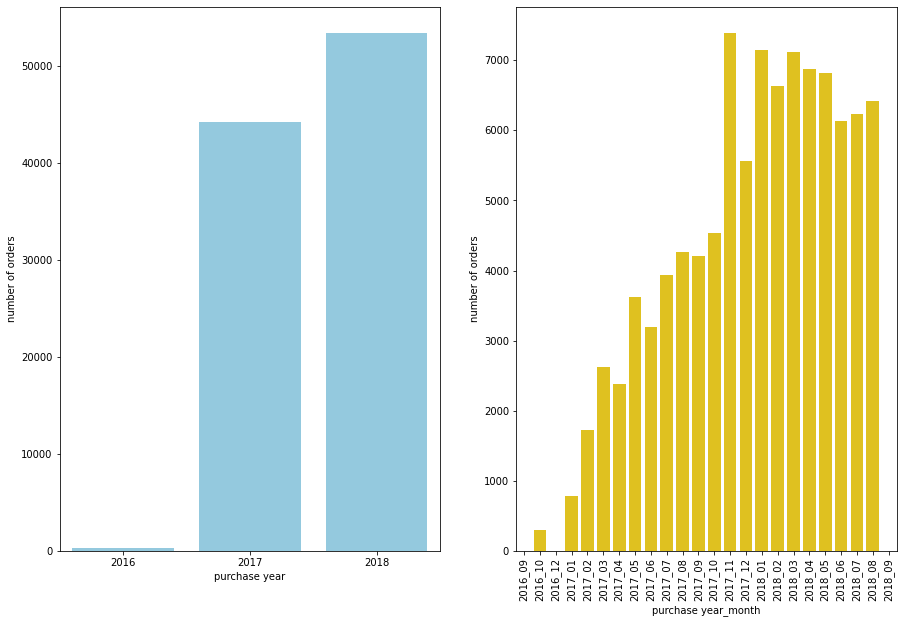

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(x = "purchase year",y = "number of orders",data=df1,color="skyblue", ax=axs[0])
sns.barplot(x = "purchase year_month",y = "number of orders",data=df2,color="gold", ax=axs[1])
axs[1].tick_params(axis="x", rotation=90)

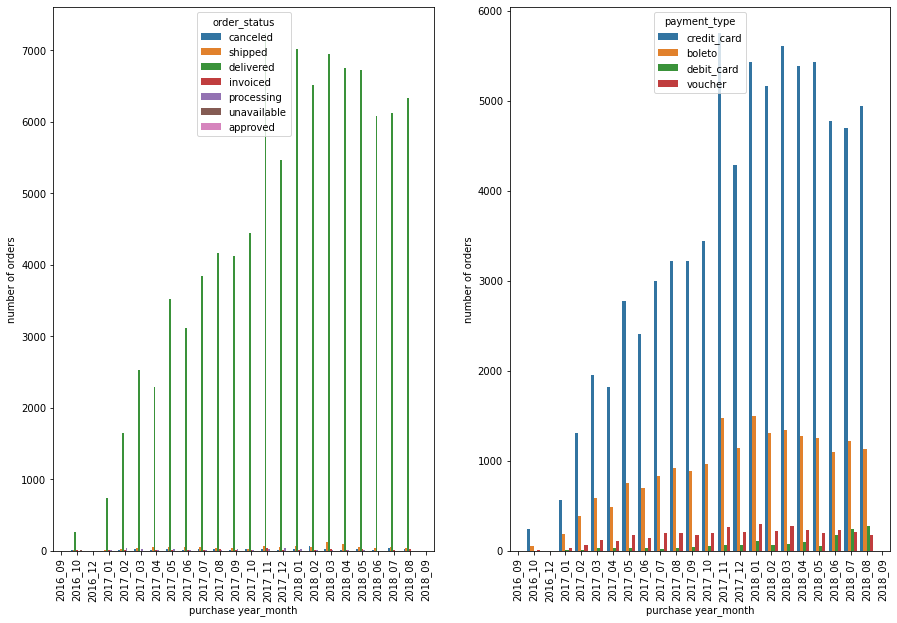

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(x = "purchase year_month",y = "number of orders",hue="order_status",data=df3, ax=axs[0])
sns.barplot(x = "purchase year_month",y = "number of orders",hue="payment_type",data=df4, ax=axs[1])
axs[0].tick_params(axis="x", rotation=90)
axs[1].tick_params(axis="x", rotation=90)

### From the above visualizations we can see that the number of orders in 2016 is way less compared to the other years mostly because of the reason that we do not have the complete data for that year. As we increase the granularity of the data we see that we only have 3 months of data for the purchase year 2016 with purchase happening only in the month of October. We also do not have purchase data for the whole 2018 year, it is only available till the month of september. 

### As we see the number of orders split based on the order_status and the payment_method, we can see that most of the orders have the status delivered and the most popular payment method is credit card. To further look at the proportions of other order statuses and payment methods we will remove the cases of delivered orders and credit card payment and see the visualization again.

In [12]:
df5 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),order_status,count(distinct order_id) from sub_df where order_status != 'delivered' group by 1,2").fetchall(),columns=["purchase year_month","order_status","number of orders"])
df6 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),payment_type,count(distinct order_id) from sub_df where payment_type != 'credit_card' group by 1,2").fetchall(),columns=["purchase year_month","payment_type","number of orders"])

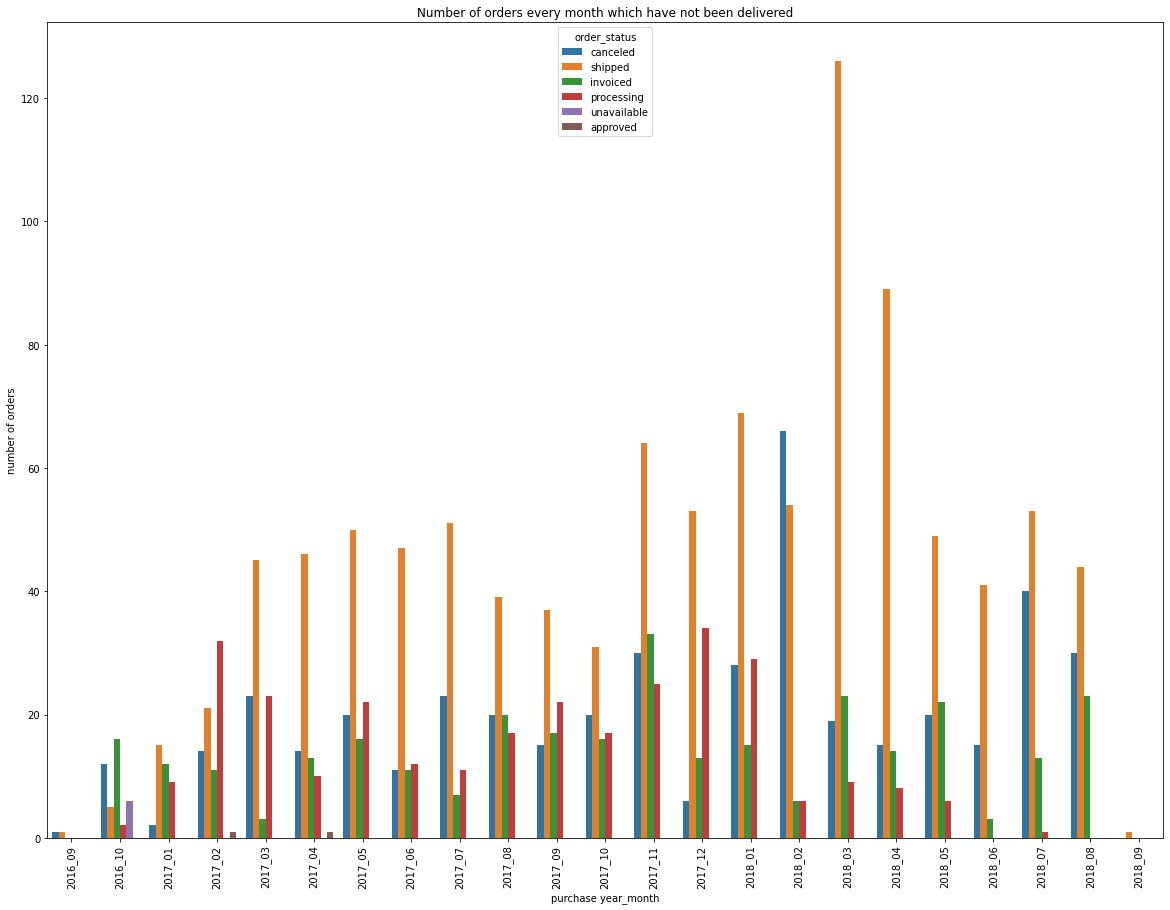

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.barplot(x = "purchase year_month",y = "number of orders",hue="order_status",data=df5, ax=axs)
# sns.barplot(x = "purchase year_month",y = "number of orders",hue="payment_type",data=df6, ax=axs[1])
# axs[0].tick_params(axis="x", rotation=90)
axs.tick_params(axis="x", rotation=90)
plt.title("Number of orders every month which have not been delivered")
plt.show()

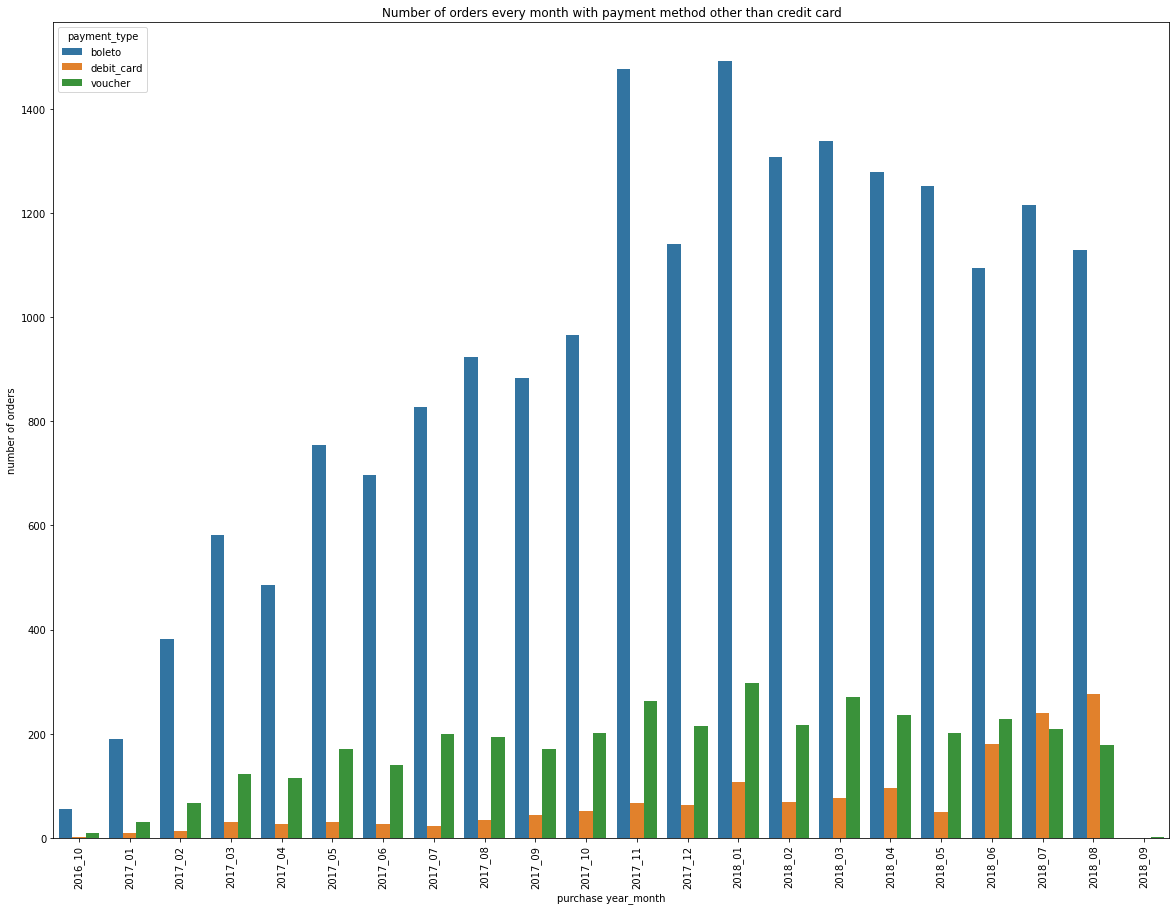

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.barplot(x = "purchase year_month",y = "number of orders",hue="payment_type",data=df6, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Number of orders every month with payment method other than credit card")
plt.show()

### Apart from the delivered order_status we can clearly see that most of the orders are in shipping stage in every month apart from some exceptions e.g. in 2016, the month of october has most of the orders in the invoiced stage followed by a high number of cancellations (relative to that month), in the year 2017 the month of February has most of the orders in the processing stage and in the year 2018 the month of February has most of the orders have been cancelled.

### As far as payment methods go, the second most popular is boleto followed by vouchers and debit cards. 

In [15]:
df_order_items = pd.DataFrame(engine.execute("select order_id,order_status,order_purchase_timestamp,count(distinct order_item_id) as noi, sum(price) as tot_price,sum(freight_value) as tot_freight from (select order_id,order_purchase_timestamp,order_status,order_item_id,price,freight_value from sub_df group by 1,2,3,4,5,6) a group by 1,2").fetchall(),columns=["order_id","order_status","order_purchase_timestamp","number_of_items","total_price","total_freight_value"])

In [16]:
df_order_items.to_sql('df_order_items', con=engine, index=False)

In [17]:
df_order_items.head()

,order_id,order_status,order_purchase_timestamp,number_of_items,total_price,total_freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,delivered,2017-09-13 08:59:02,1,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,delivered,2017-04-26 10:53:06,1,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,delivered,2018-01-14 14:33:31,1,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,delivered,2018-08-08 10:00:35,1,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,delivered,2017-02-04 13:57:51,1,199.90,18.14


In [18]:
df_payments = pd.DataFrame(engine.execute("select order_id,order_approved_at,nopm,max(payment_installments),sum(payment_value) from (select order_id,order_approved_at,payment_type,payment_installments,payment_value,max(payment_sequential) over (partition by order_id) as nopm from sub_df group by 1,2,3,4,5) a group  by 1,2").fetchall(),columns=["order_id","order_approved_at","number_of_payment_methods","payment_installments","total_payment"])

In [19]:
df_payments.head()

,order_id,order_approved_at,number_of_payment_methods,payment_installments,total_payment
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 09:45:35,1,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 11:05:13,1,3,259.83
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:48:30,1,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:10:18,1,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 14:10:13,1,3,218.04


In [20]:
df_payments.to_sql('df_payments', con=engine, index=False)

In [21]:
df7 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),order_status,sum(total_price) from df_order_items group by 1,2").fetchall(),columns=["purchase year_month","order_status","total_price"])
df8 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),order_status,sum(total_price) from df_order_items where order_status != 'delivered' group by 1,2").fetchall(),columns=["purchase year_month","order_status","total_price"])

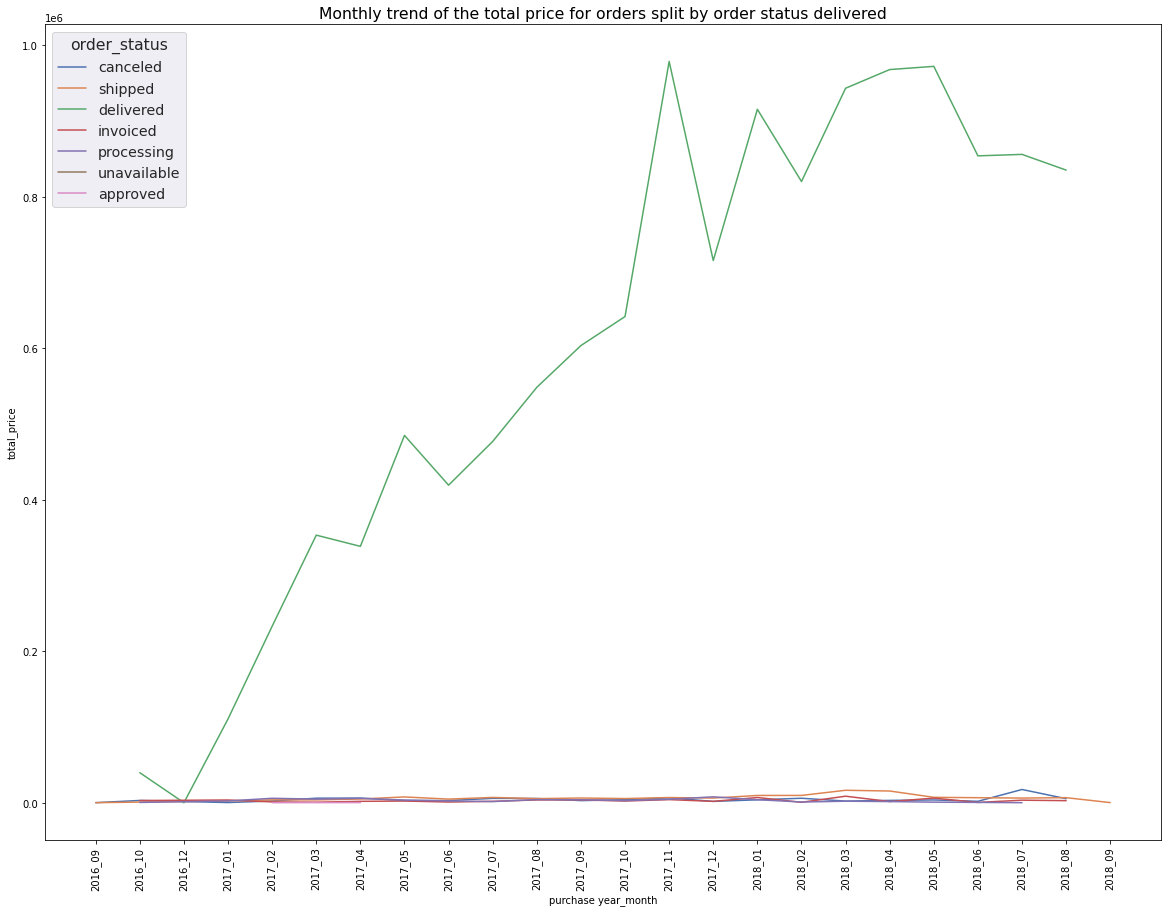

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.lineplot(x = "purchase year_month",y = "total_price",hue="order_status",data=df7, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Monthly trend of the total price for orders split by order status delivered")
plt.show()

### Most of the orders have the status as delivered which is expected. The month of november in 2017 marks for the highest total price amongst delivered orders. Let us take a deeper look into the total price on a monthly basis for orders that have not been delivered .

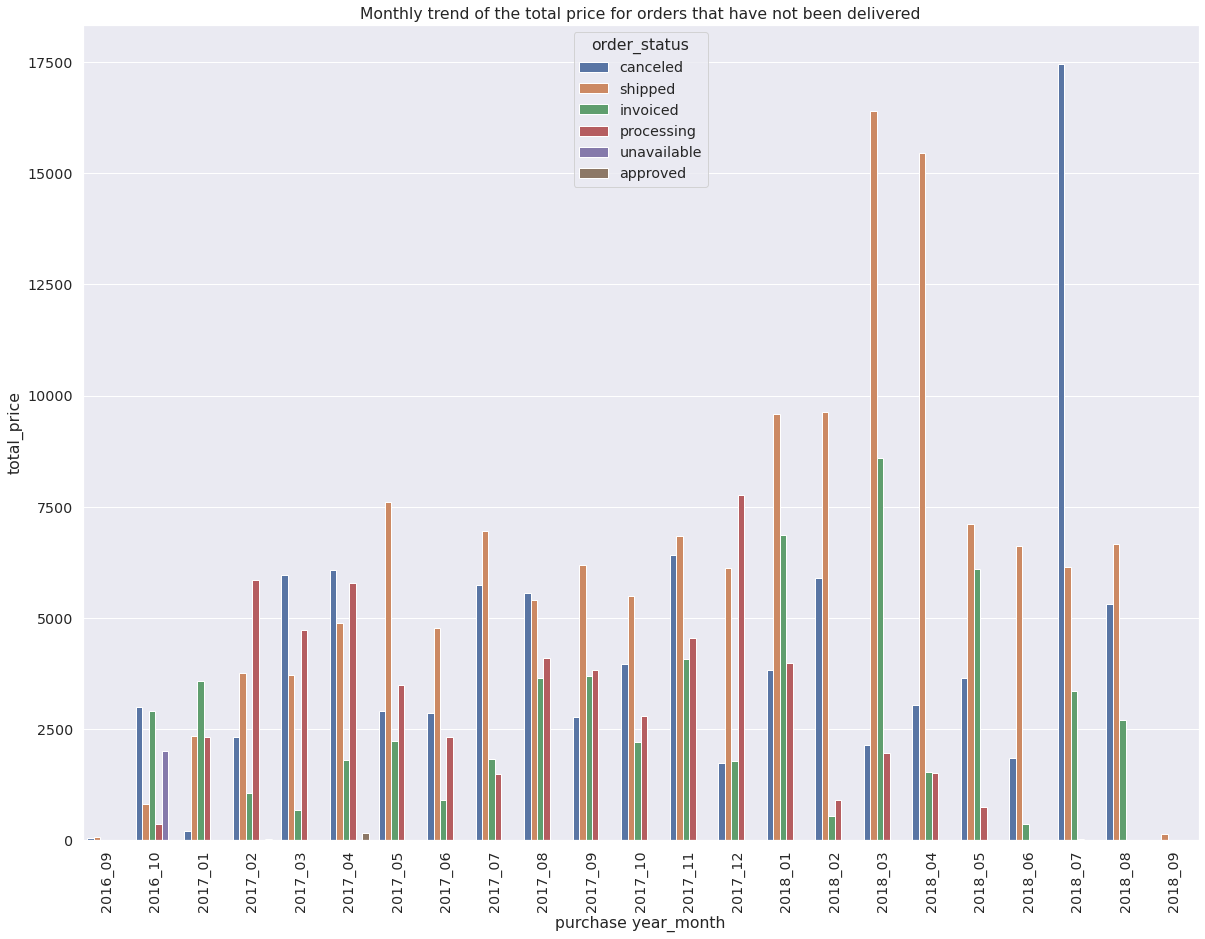

In [23]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.barplot(x = "purchase year_month",y = "total_price",hue="order_status",data=df8, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Monthly trend of the total price for orders that have not been delivered")
plt.show()

### Removing the delivered orders makes it much easier to visualize the other orders as they have comparable number of orders. Here we can see that shipped orders have the majority of the total price in almost every month. In July of 2018, we have a huge chunk of total price which belongs to cancelled orders (it is still very small compared to the total price we get from delivered orders in that month). Which is surprising because the month of February in 2018 has way more cancelled orders than July (as seen in the previous plot). This could be because of the fact that the prices of orders cancelled in July is higher than those of the cancelled orders in Feb.

In [24]:
df9 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),avg(number_of_items) from df_order_items group by 1").fetchall(),columns=["purchase year_month","avg_no_items_in_an_order"])

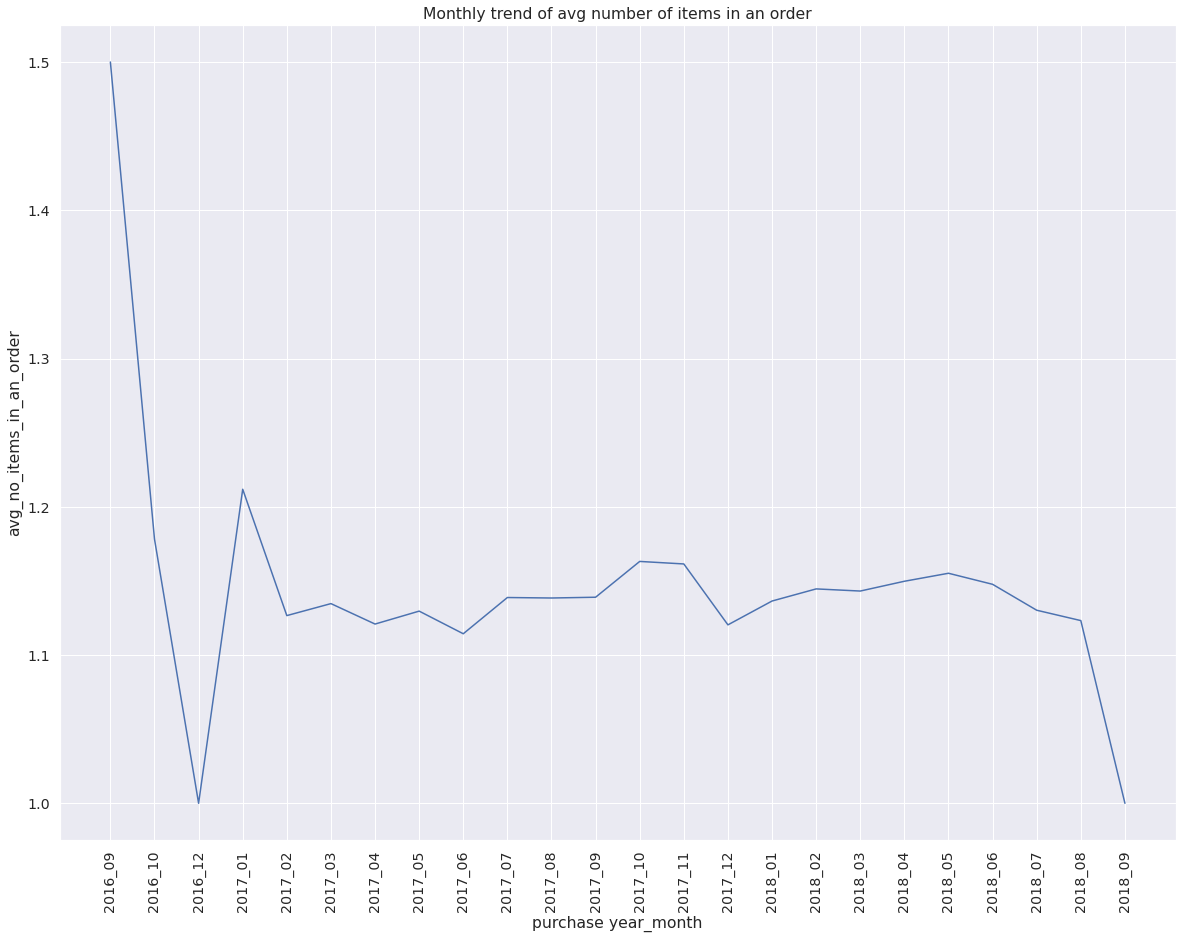

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.lineplot(x = "purchase year_month",y = "avg_no_items_in_an_order",data=df9, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Monthly trend of avg number of items in an order")
plt.show()

### Avg number of items in an order usually ranges between 1.1 and 1.2, the month of January in the year 2017 had the most number of orders with multiple items. Whereas the only months in which all orders had only 1 item are December 2016 and September 2018, but that could also be because of the lack of data. 

In [26]:
df9 = pd.DataFrame(engine.execute("select CASE WHEN CAST(strftime('%H', order_purchase_timestamp) as int) > 0 and CAST(strftime('%H', order_purchase_timestamp) as int) < 6 then '00-06 hours' WHEN CAST(strftime('%H', order_purchase_timestamp) as int) >= 6 and CAST(strftime('%H', order_purchase_timestamp) as int) < 12 then '06-12 hours' WHEN CAST(strftime('%H', order_purchase_timestamp) as int) >= 12 and CAST(strftime('%H', order_purchase_timestamp) as int) < 18 then '12-18 hours' else '18-24 hours' end as time_of_day,count(distinct order_id) from df_order_items group by 1").fetchall(),columns=["time_of_day","number_of_orders"])

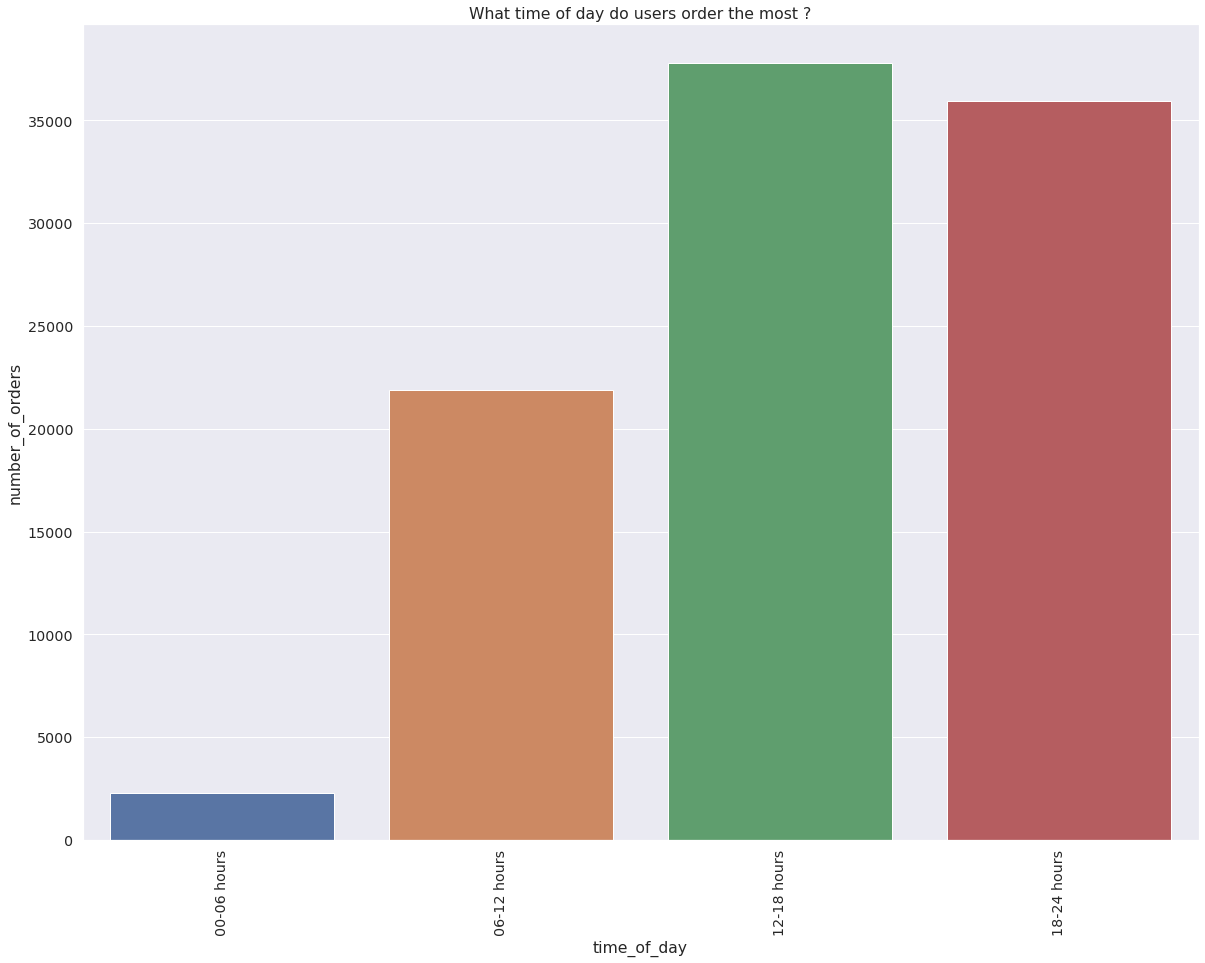

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.barplot(x = "time_of_day",y = "number_of_orders",data=df9, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("What time of day do users order the most ?")
plt.show()

### We can clearly see that most of the users order between 12 in the noon and midnight. Very few orders have been placed late at night and very early in the morning i.e. after midnight and before 6AM. A good chunk of orders have been placed early morning and between noon as well. 

In [50]:
df10 = pd.DataFrame(engine.execute("select CASE WHEN CAST(strftime('%H', order_purchase_timestamp) as int) > 0 and CAST(strftime('%H', order_purchase_timestamp) as int) < 6 then '00-06 hours' WHEN CAST(strftime('%H', order_purchase_timestamp) as int) >= 6 and CAST(strftime('%H', order_purchase_timestamp) as int) < 12 then '06-12 hours' WHEN CAST(strftime('%H', order_purchase_timestamp) as int) >= 12 and CAST(strftime('%H', order_purchase_timestamp) as int) < 18 then '12-18 hours' else '18-24 hours' end as time_of_day,strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),count(distinct order_id) from df_order_items group by 1,2").fetchall(),columns=["time_of_day","purchase_year_month","number_of_orders"])

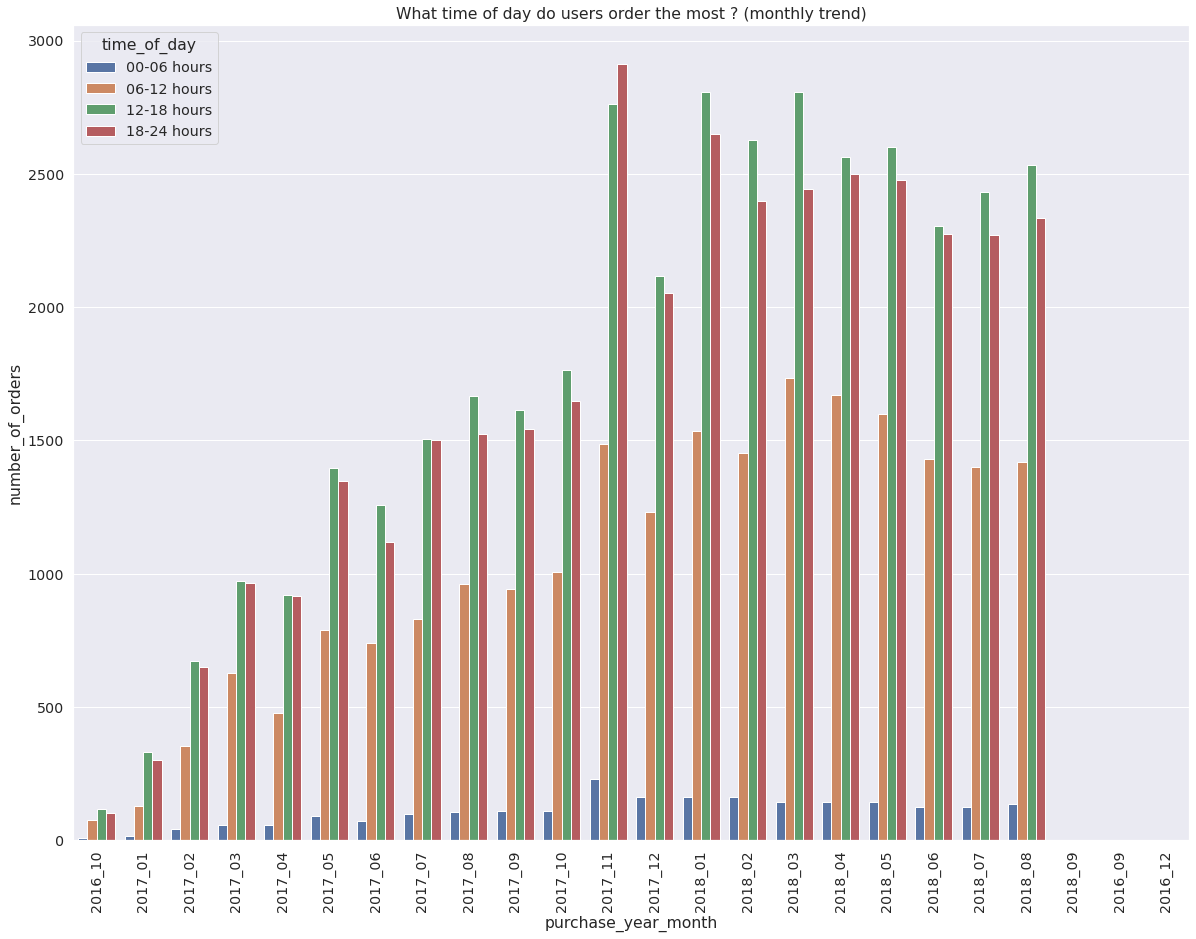

In [51]:
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.barplot(x = "purchase_year_month",y = "number_of_orders",hue="time_of_day",data=df10, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("What time of day do users order the most ? (monthly trend)")
plt.show()

### On seeing the monthly trend as to what time of the day users place the order, majority of the orders every month are between 12-24 hours. Which is what we expected. Almost every month has number of orders in the 12-18 hour range as the highest expect for the month of november in 2017, where orders in the 18-24 hours exceeds 12-18 hour range. This could be because of black friday sales. The number of orders in the 00-06 hour range is also maximum during that month. 

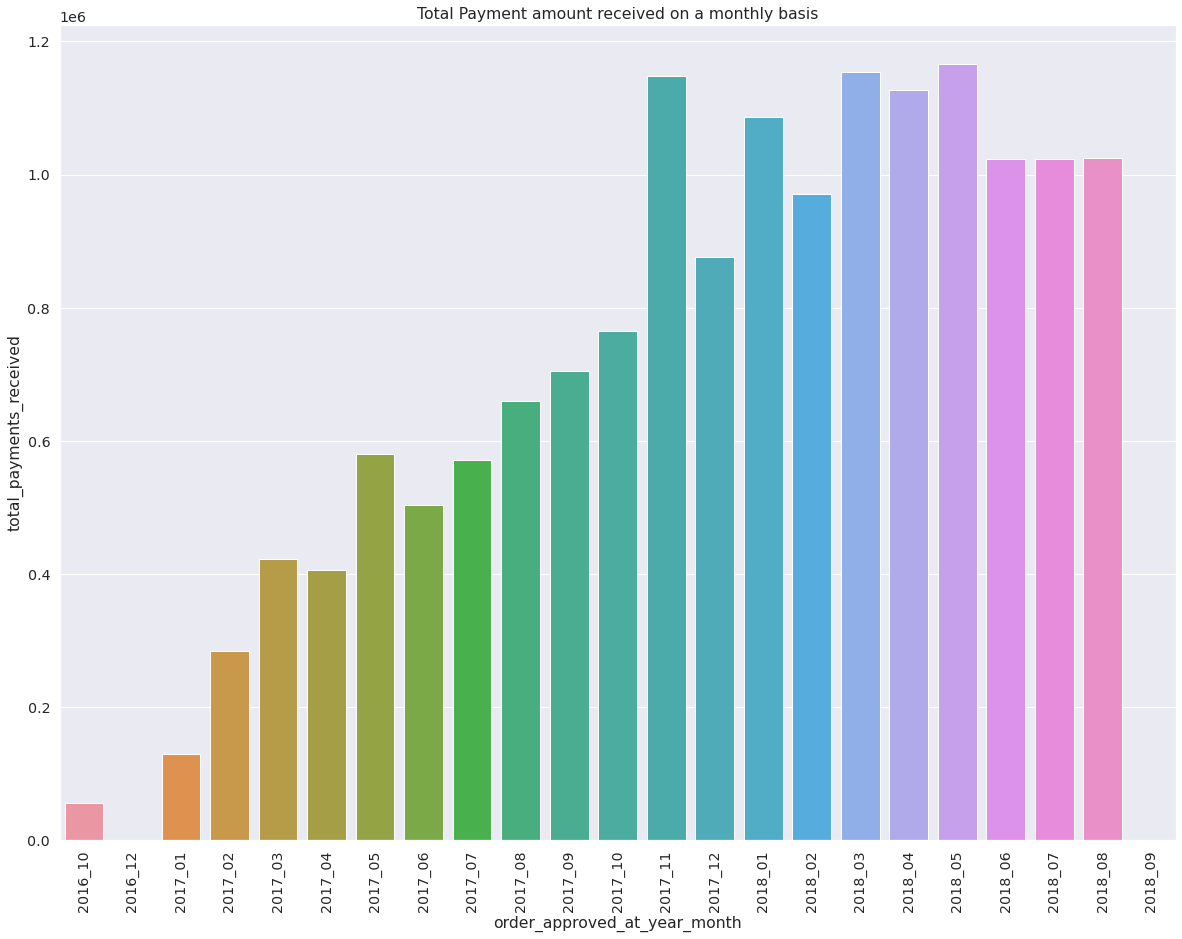

In [52]:
df11 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_approved_at)) || '_' || strftime('%m', date(order_approved_at)),sum(total_payment) from df_payments group by 1").fetchall(),columns=["order_approved_at_year_month","total_payments_received"])
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.barplot(x = "order_approved_at_year_month",y = "total_payments_received",data=df11, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Total Payment amount received on a monthly basis")
plt.show()

### This plot gives us a good estimate of the revenue that the E-Commerce website collects every month. We can see a clear increasing trend which is a good thing. 

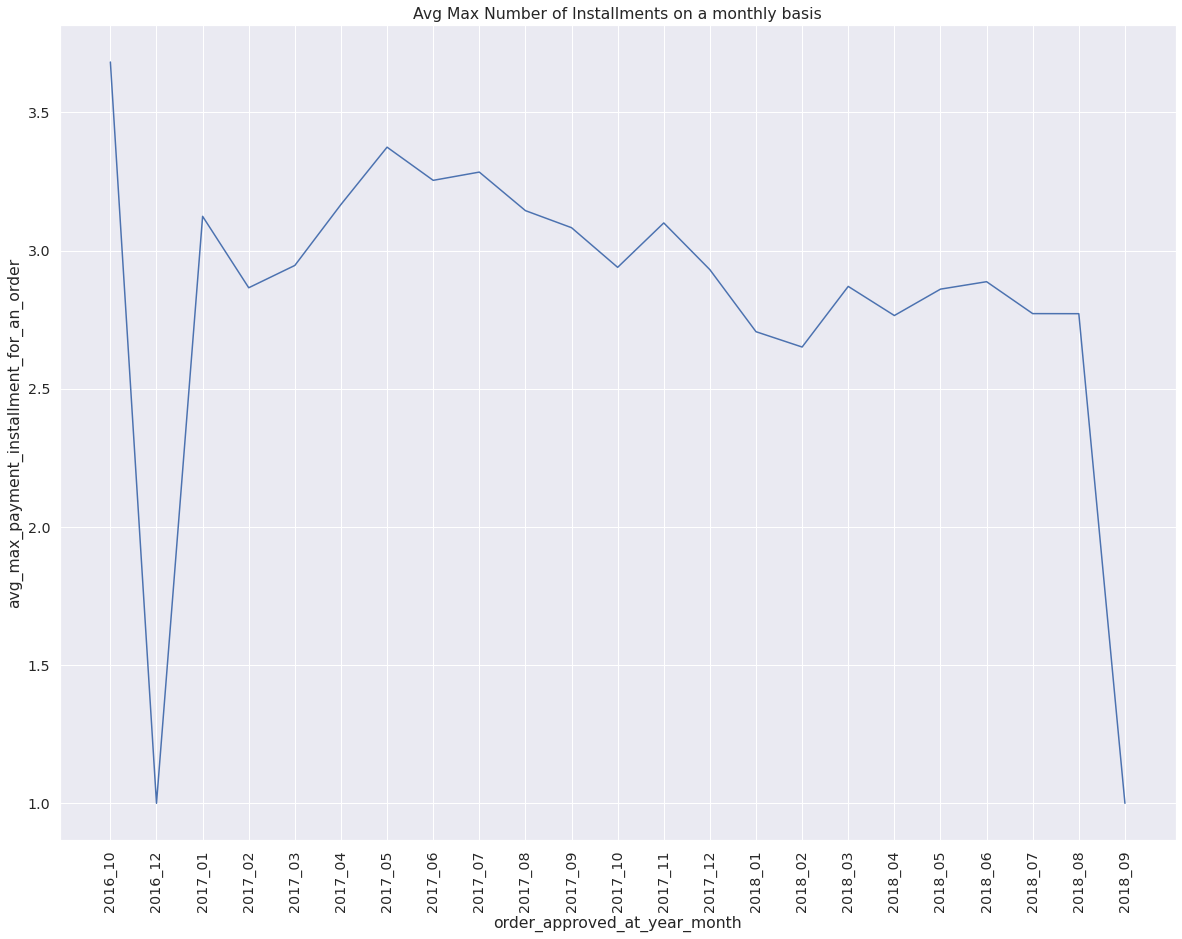

In [37]:
df12 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_approved_at)) || '_' || strftime('%m', date(order_approved_at)),avg(payment_installments) from df_payments group by 1").fetchall(),columns=["order_approved_at_year_month","avg_max_payment_installment_for_an_order"])
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.lineplot(x = "order_approved_at_year_month",y = "avg_max_payment_installment_for_an_order",data=df12[1:], ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Avg Max Number of Installments on a monthly basis")
plt.show()

### The average of the max number of installments in an order every month usually fluctuates around the value of 3. Hence, customers on an average prefer to pay in 3 installments. The data at start and end is a bit misleading as we do not have a lot of orders during those dates.

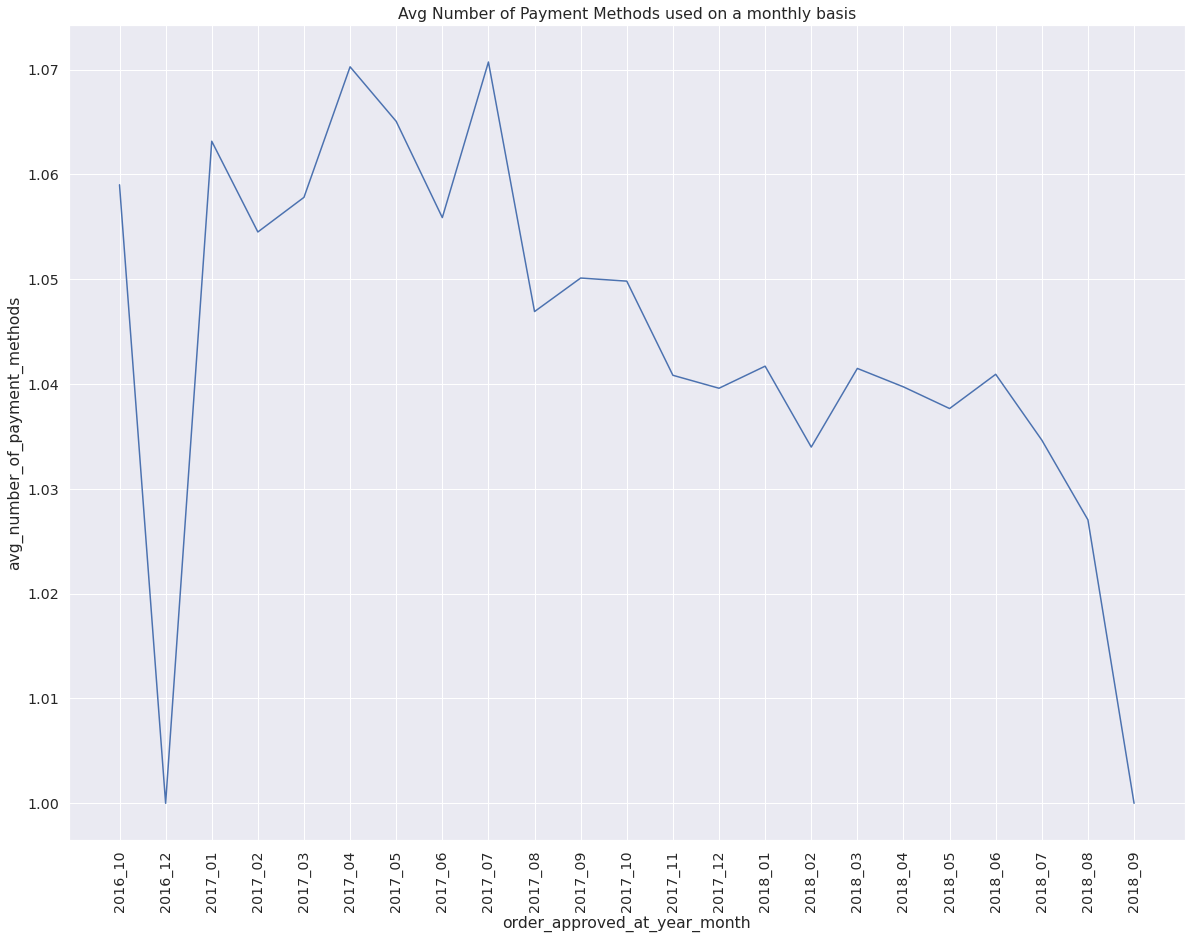

In [39]:
df13 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_approved_at)) || '_' || strftime('%m', date(order_approved_at)),avg(number_of_payment_methods) from df_payments group by 1").fetchall(),columns=["order_approved_at_year_month","avg_number_of_payment_methods"])
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.lineplot(x = "order_approved_at_year_month",y = "avg_number_of_payment_methods",data=df13[1:], ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("Avg Number of Payment Methods used on a monthly basis")
plt.show()

### Here we calculate the avg of the max value of the payment_sequential column for an order in a month. We can see that not a lot of users use multiple payment methods to pay for their order as the max value obtained is not that far off from 1. The months of april and july in 2017 are the ones where multiple payment methods have been used the most as compared to other months.

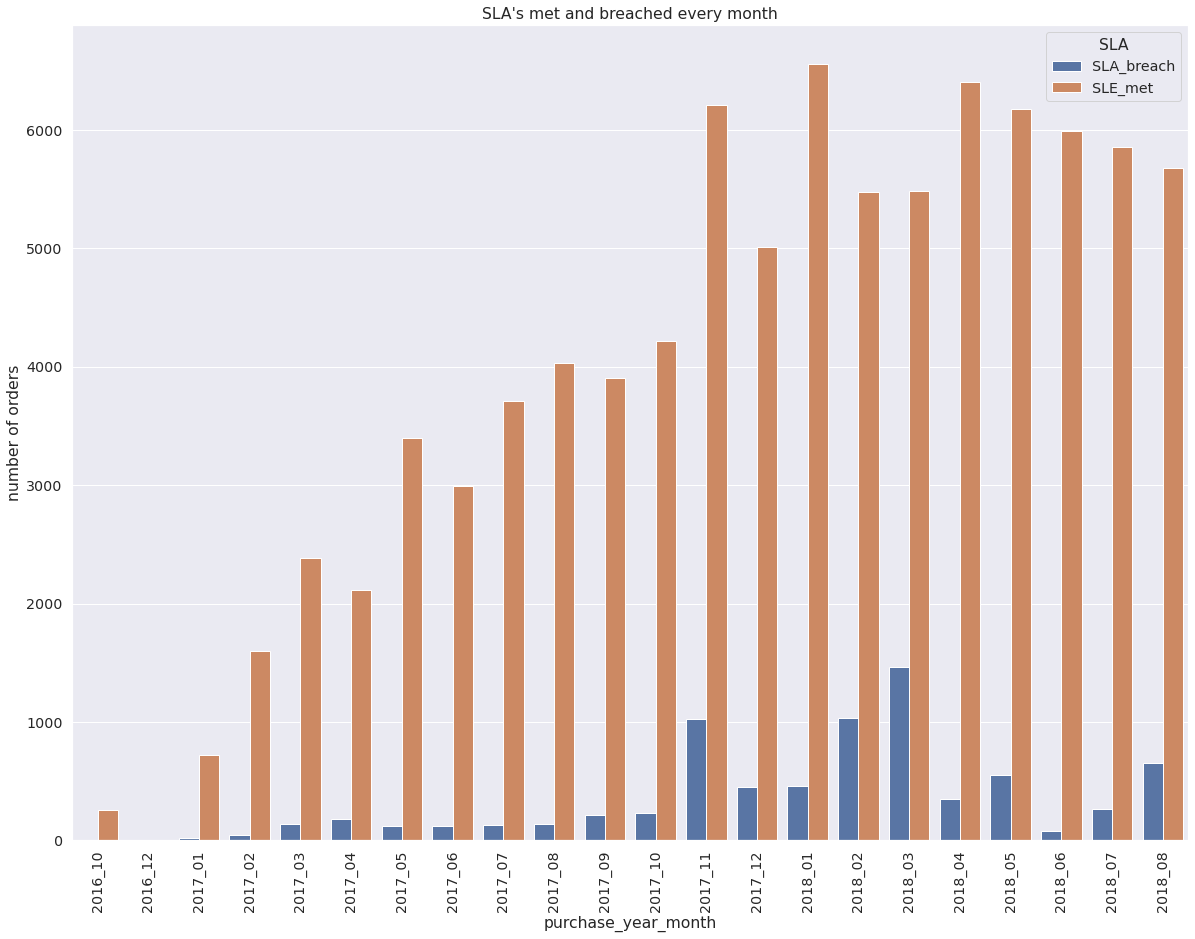

In [49]:
df14 = pd.DataFrame(engine.execute("select strftime('%Y', date(order_purchase_timestamp)) || '_' || strftime('%m', date(order_purchase_timestamp)),CASE WHEN date(order_delivered_customer_date) >= date(order_estimated_delivery_date) then 'SLA_breach' else 'SLE_met' end as SLA,count(distinct order_id) from sub_df where order_status == 'delivered' group by 1,2").fetchall(),columns=["purchase_year_month","SLA","number of orders"])
fig, axs = plt.subplots(1, 1, figsize=(20,15))
sns.set(font_scale = 1.3)
sns.barplot(x = "purchase_year_month",y = "number of orders",hue="SLA",data=df14, ax=axs)
axs.tick_params(axis="x", rotation=90)
plt.title("SLA's met and breached every month")
plt.show()

### The SLA(service level agreement) is met if the order is delivered before or on the day of the promised delivery. We can see that the month of march in 2018 and the black friday month in 2017 have the maximum number of orders that not met the SLA. NOTE: This is only for orders with order_status as "delivered".